## **Analisando as vendas**

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [4]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [5]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [6]:
alucar['mes']=pd.to_datetime(alucar['mes'])

In [7]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
!pip install seaborn
import seaborn as sns
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0, 0.5, 'Aumento')

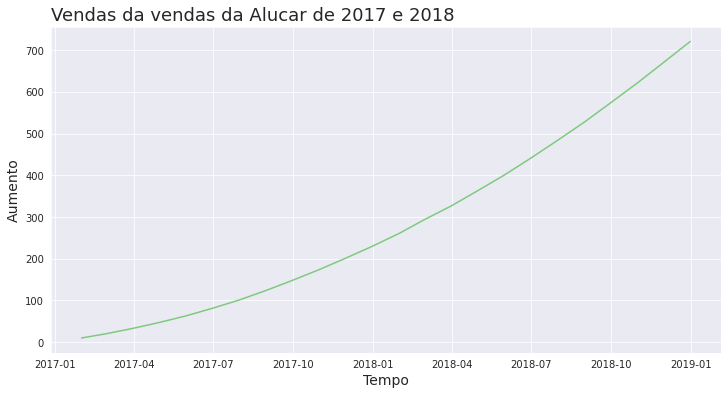

In [9]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax: ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas da vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)

In [10]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [11]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [12]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


In [13]:
def plotar (titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x='mes', y='aumento', data=alucar)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


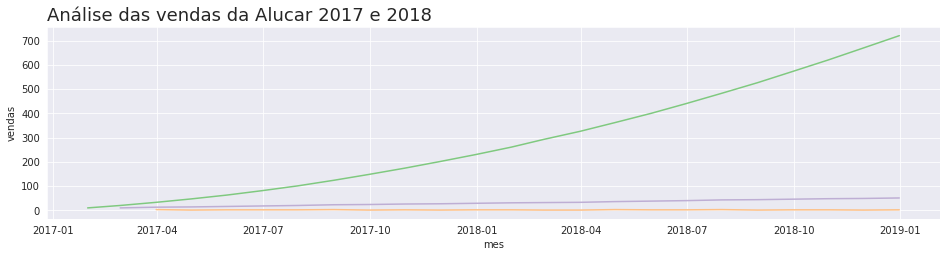

In [14]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise das vendas da Alucar 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3, 1, 1)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,1)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [15]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

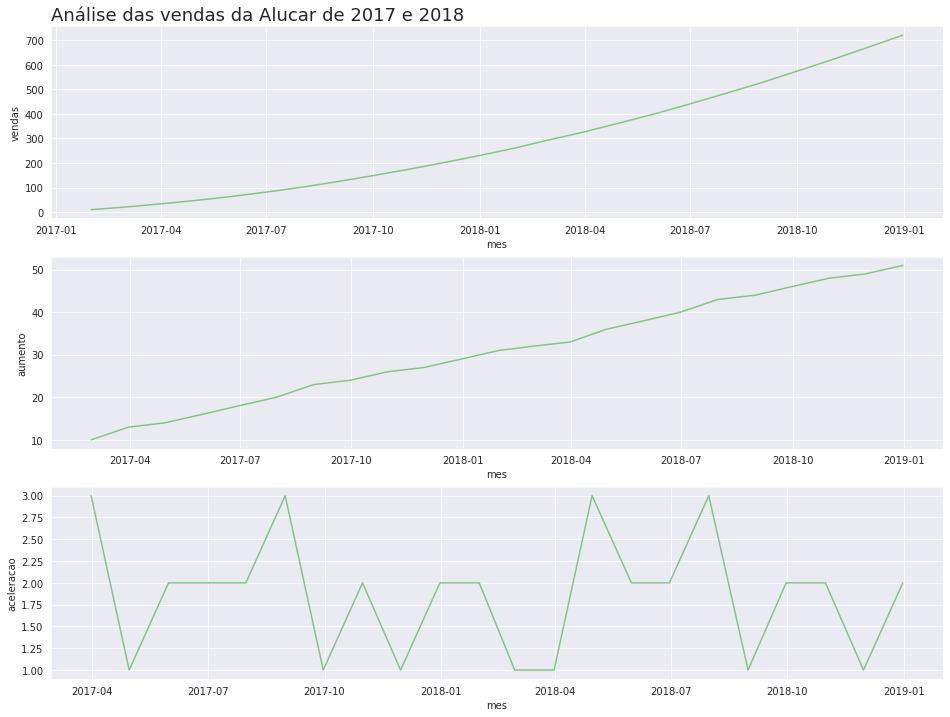

In [16]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                alucar, 'Análise das vendas da Alucar de 2017 e 2018') 

In [17]:
from pandas.plotting import autocorrelation_plot

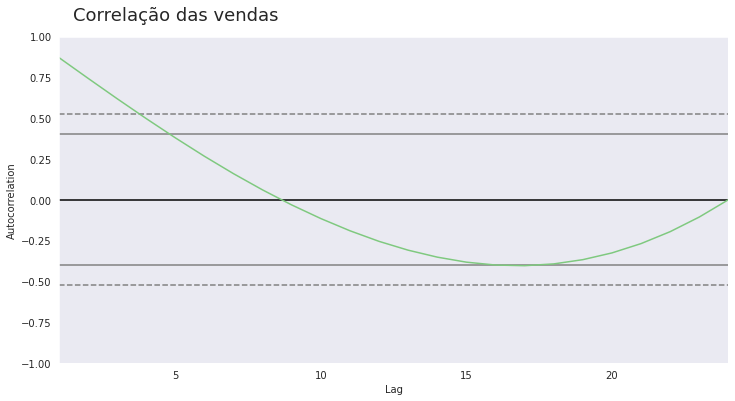

In [18]:
ax= plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax=ax

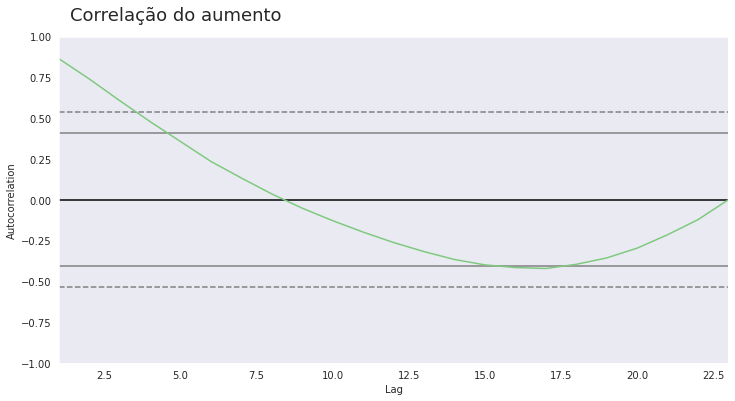

In [19]:
ax= plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

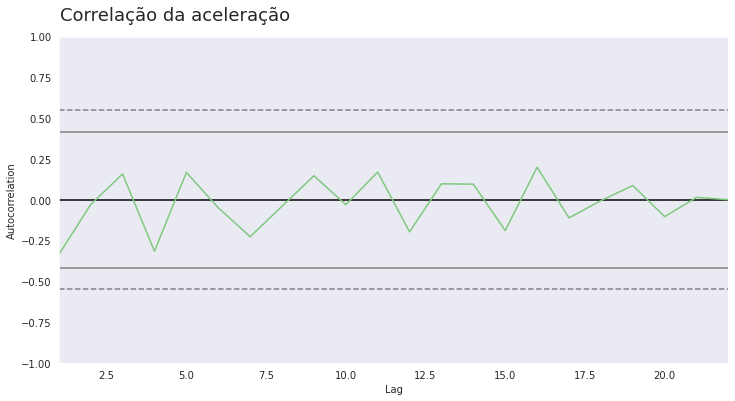

In [20]:
ax= plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax

## Analisando assinantes da newsletter

In [21]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [22]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [23]:
print('Quantidades de linhas e colunas:', assinantes.shape)
print('Qauntidades de dados nulos:', assinantes.isna().sum().sum())

Quantidades de linhas e colunas: (24, 2)
Qauntidades de dados nulos: 0


In [24]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [25]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [26]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


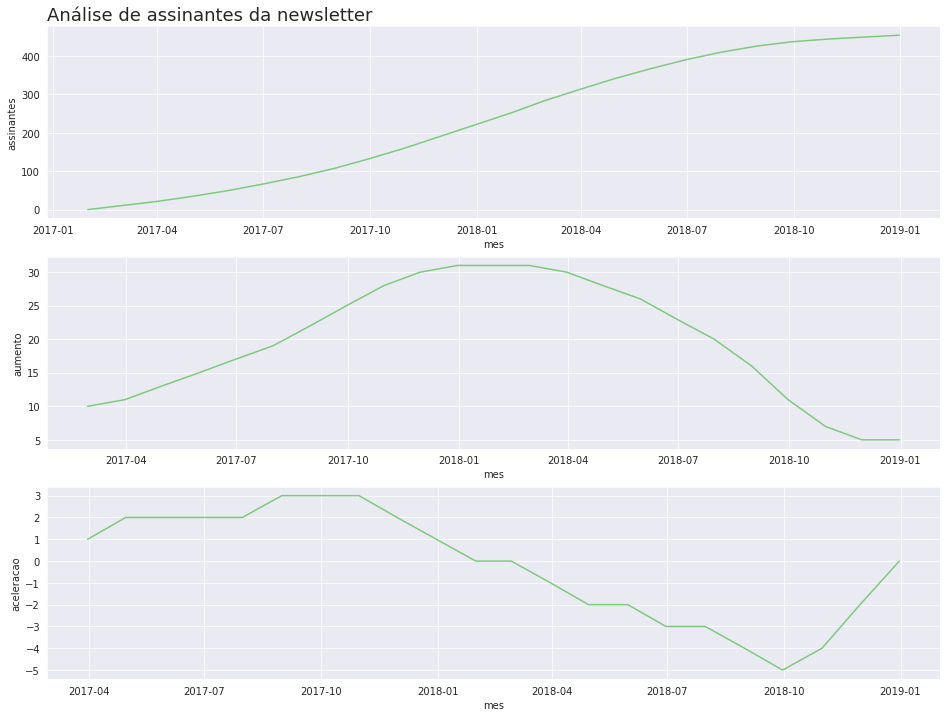

In [27]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', 
                assinantes, 'Análise de assinantes da newsletter')

#Analisando as vendas

#Chocolura

In [28]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [29]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [30]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [31]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [32]:
print('Quantidade de linhas:', chocolura.shape)
print('Quantidade de dados nulos', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos 0


In [33]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


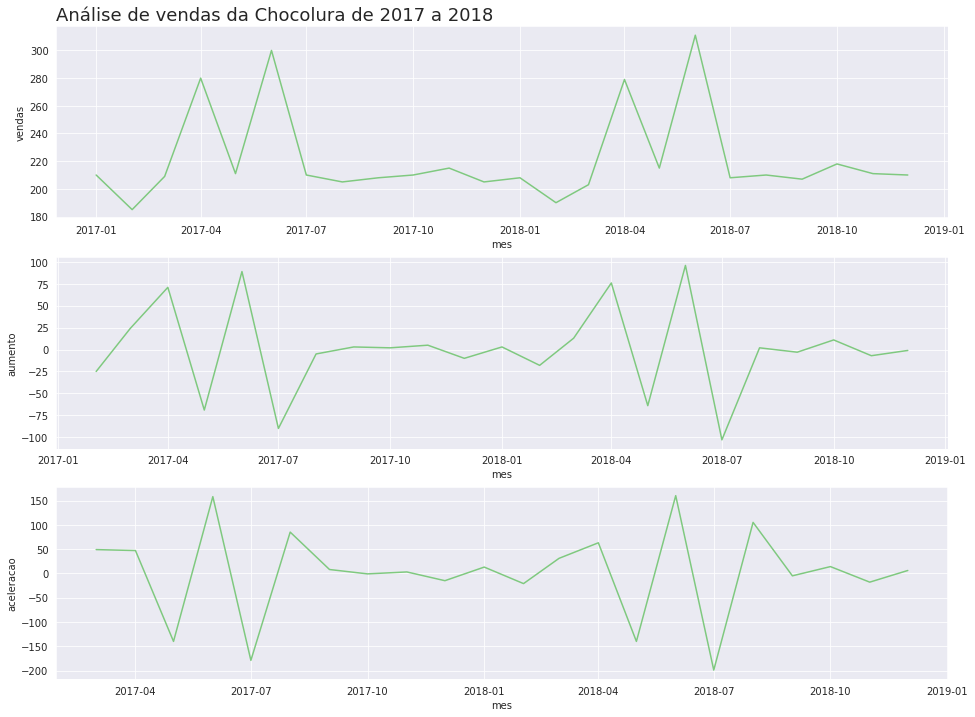

In [34]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', 
                chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

#Vendas diárias(Outubro e Novembro)

In [35]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [36]:
print('Quantidade de linhas e colunas', vendas_por_dia.shape)
print('Quantidade de valores nulos', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas (61, 2)
Quantidade de valores nulos 0


In [37]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [38]:
vendas_por_dia['dia']  = pd.to_datetime(vendas_por_dia['dia'])

In [39]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [40]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


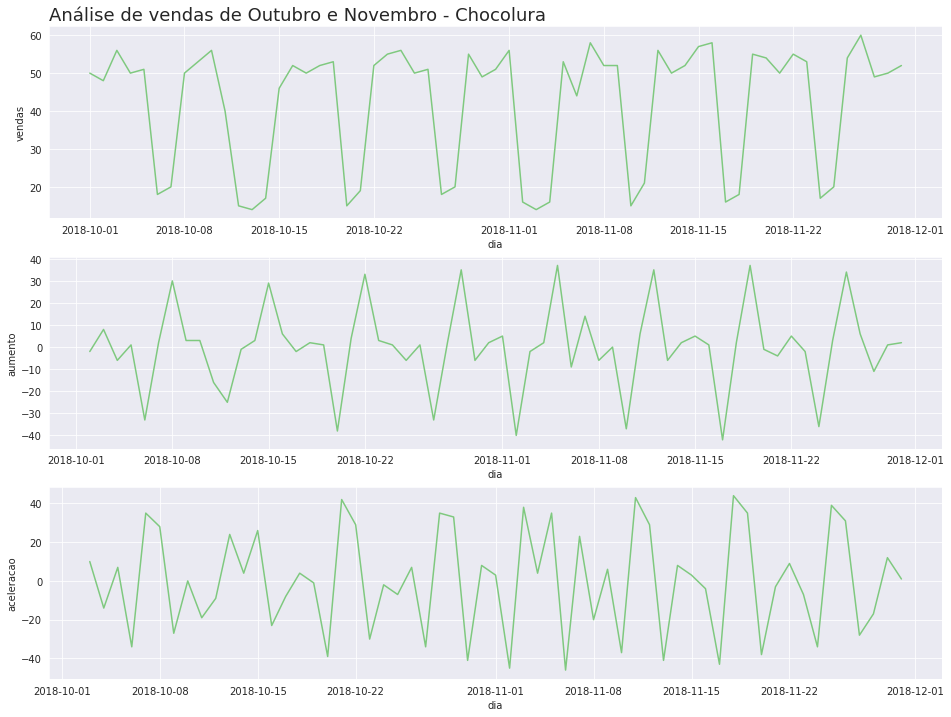

In [41]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

#Analisando a sazonalidade

In [42]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.strftime("%A")

vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [43]:
vendas_por_dia['dia_da_semana'].unique()
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [44]:
dias_traduzidos = {'Monday':'Segunda', 
                  'Tuesday':'Terca', 
                  'Wednesday':'Quarta',
                  'Thursday':'Quinta', 
                  'Friday':'Sexta', 
                  'Saturday':'Sábado',
                  'Sunday':'Domingo'}

dias_traduzidos

{'Friday': 'Sexta',
 'Monday': 'Segunda',
 'Saturday': 'Sábado',
 'Sunday': 'Domingo',
 'Thursday': 'Quinta',
 'Tuesday': 'Terca',
 'Wednesday': 'Quarta'}

In [45]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [46]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


#Agrupando os dias

In [47]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [48]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terca,52.0,-1.0,-34.0


**Correlação das vendas diárias**

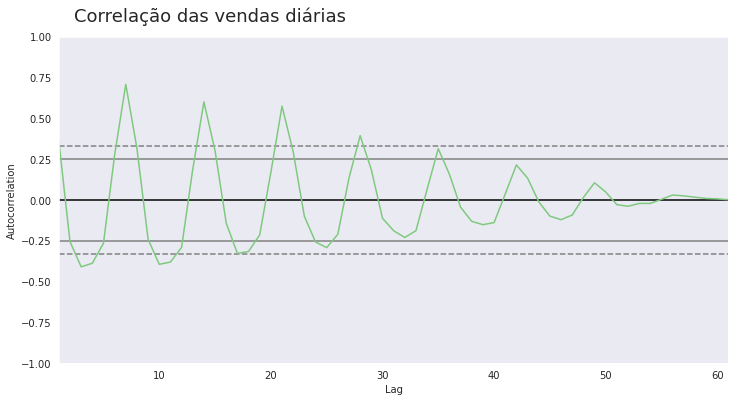

In [49]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

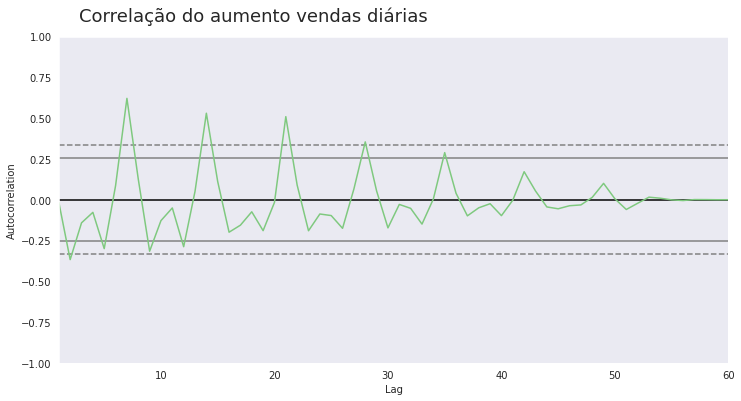

In [50]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

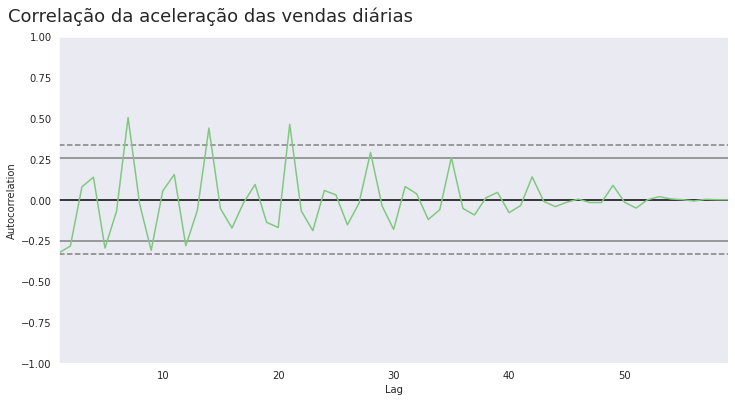

In [51]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

#Cafelura - Análise de vendas

In [52]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [53]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [54]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [55]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


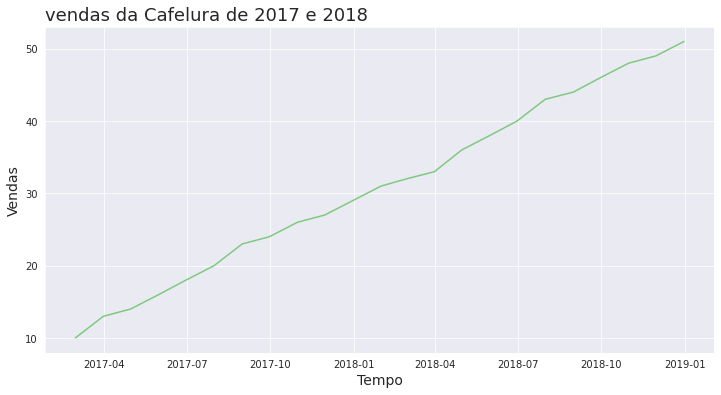

In [56]:
plotar('vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura) 

In [63]:
quantidades_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidades_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [58]:
quantidades_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [62]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidades_de_dias_de_fds['quantidade_de_dias']
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


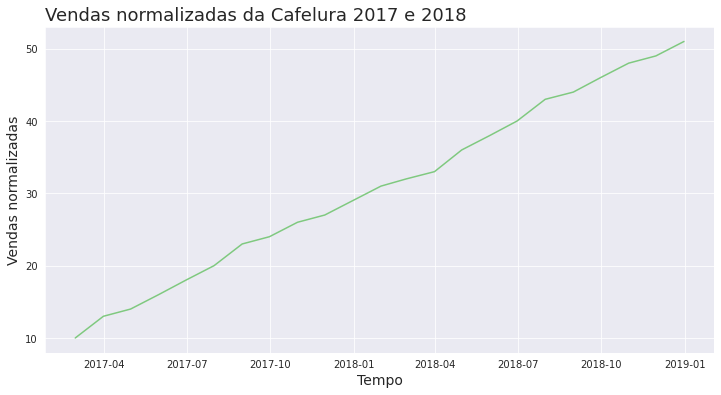

In [64]:
plotar('Vendas normalizadas da Cafelura 2017 e 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas',
       cafelura)

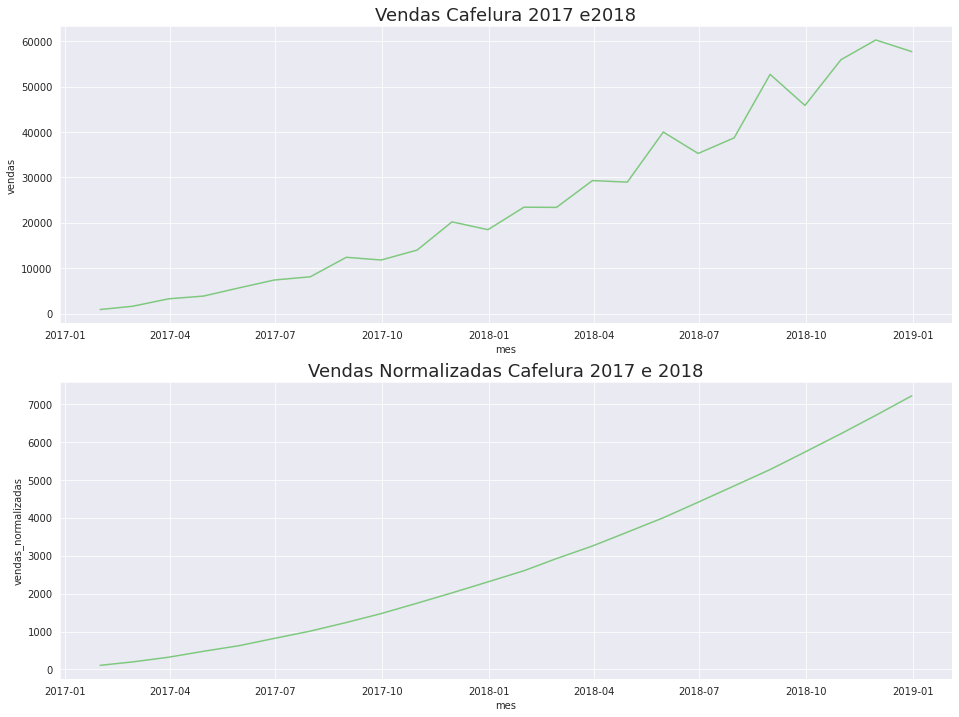

In [65]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax= plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax


In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

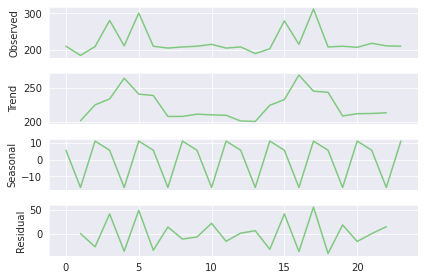

In [69]:
resultado = seasonal_decompose(chocolura['vendas'], freq=3)
ax = resultado.plot()

In [71]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [72]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


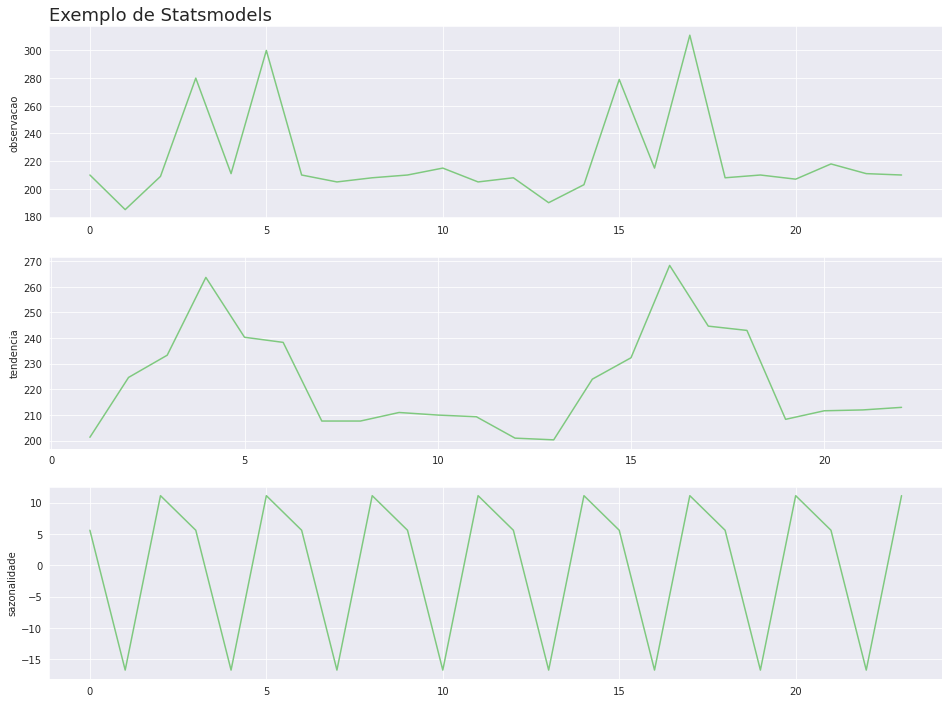

In [73]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade',
                resultado, 'Exemplo de Statsmodels')

In [74]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [75]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [78]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [79]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [80]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

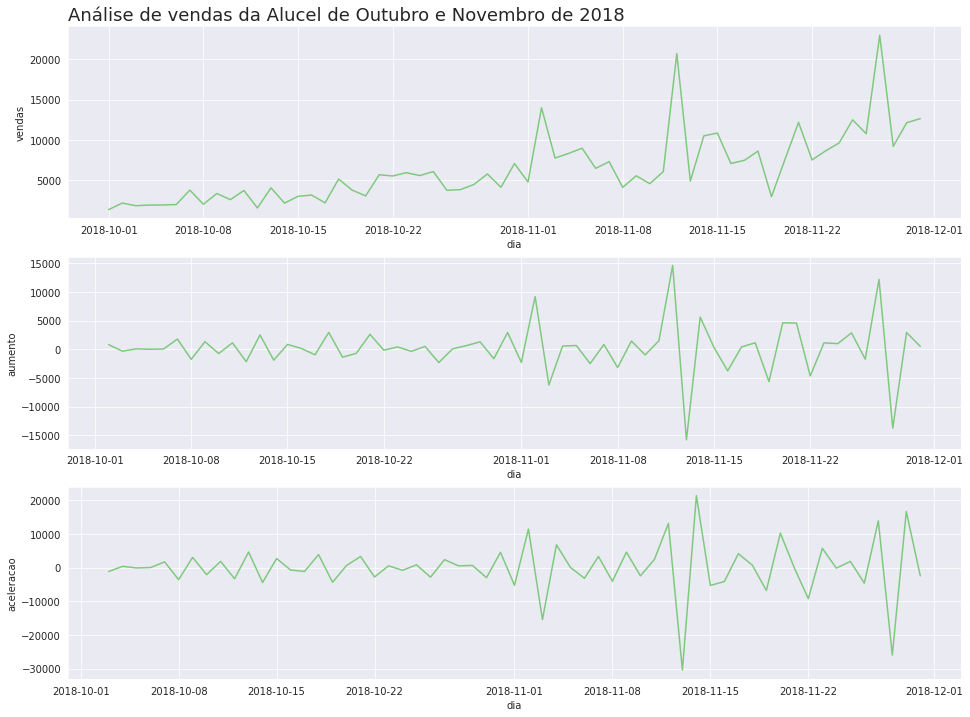

In [82]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel,
                'Análise de vendas da Alucel de Outubro e Novembro de 2018') 

**Média Movél**

In [84]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


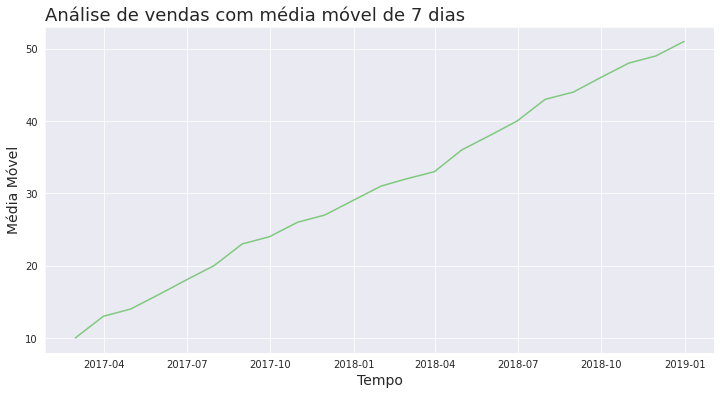

In [85]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 
       'dia', 'media_movel', alucel)

In [91]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

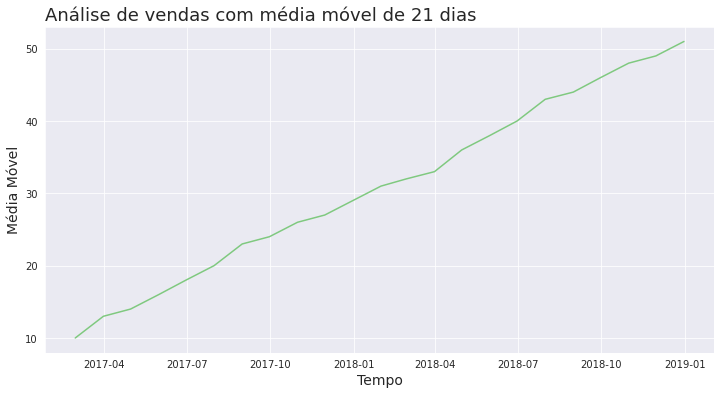

In [92]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 
       'dia', 'media_movel_21', alucel)

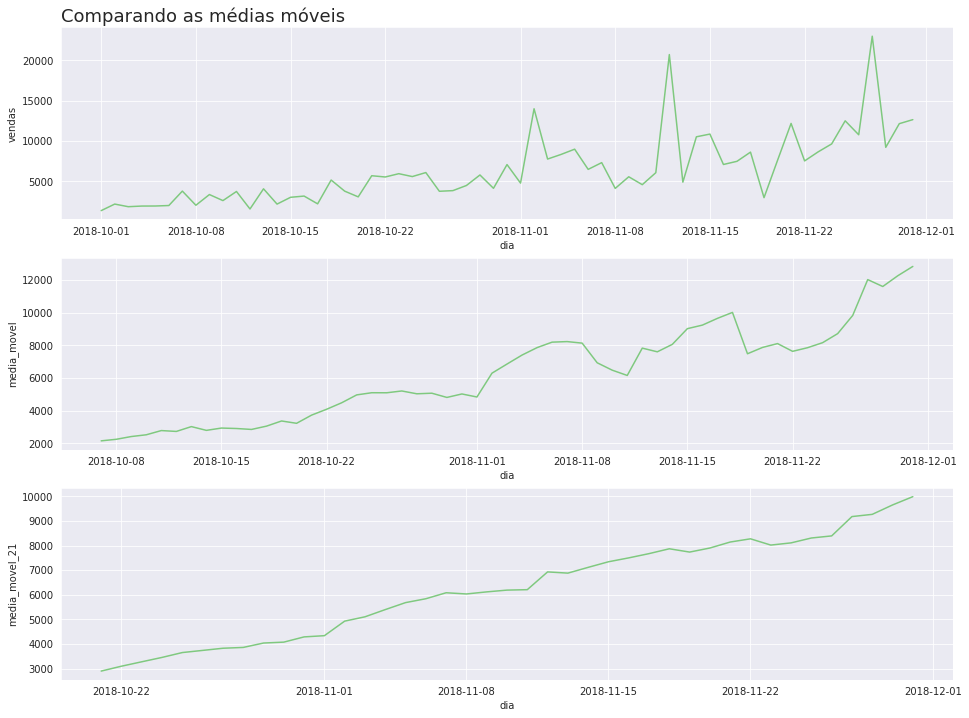

In [93]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21',
                alucel, 'Comparando as médias móveis')